<a href="https://colab.research.google.com/github/HagarIbrahiem/Learning_purposes/blob/main/EDA__Cross_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Cross Vaalidation**

 Cross-Validation is a validation technique for assessing the functioning of a particular model with the help of samples obtained from a data set.

 While there are numerous ways to cross-validate a model, all methods aim to test a data sample kept aside from the training data set. A set of 3 steps are involved in the process of cross-validation. These are as follows :

 

1- Separate a part of the data set from the rest.

2- Utilize the rest of the data set to train the ML model.

3- Once the model is ready, validate the model using the data set that was separated earlier.



**Why Cross-Validation is Important?**

1- More than validating the model and testing its accuracy, cross-validation is used for measuring overfitting and any other errors that might be noticed while testing the model.

2- Similarly, cross-validation can also be used to identify and mitigate underfitting.

3- CV is useful if we have limited data when our test set is not large enough. 

4- It is always preferred to use a model with better CV performance

### Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')
!ls drive/'My Drive'/ML_Process_Data_Files/Section_8_Cross_Validation

Mounted at /content/drive
fraud_data.csv


In [37]:
df = pd.read_csv("drive/My Drive/ML_Process_Data_Files/Section_8_Cross_Validation/fraud_data.csv")



In [4]:
df.shape

(108213, 14)

In [5]:
df[df['isFraud'] == 1].shape

(8213, 14)

In [7]:
df[df['isFraud'] == 0].shape

(100000, 14)

In [8]:
## Sample down to improve speed
pos = df[df['isFraud'] == 1].copy()
neg = df[df['isFraud'] == 0].sample(100000)

df = pos.append(neg)

In [9]:
df.shape

(108213, 14)

In [11]:
df.head(1)

,Unnamed: 0,Unnamed: 0.1,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,date
0,2,2,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0,2021-11-27


In [12]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'step', 'type', 'amount', 'nameOrig',
       'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud', 'date'],
      dtype='object')

# Cross Validation Teecniques

##First: Holdout Cross-Validation OR (Train-Test-Split)



- the simplest form of CV. To get started, the data sample is divided into two parts - Training Data Set and Testing Data Set. 

- Before the division takes place, the data sample is shuffled so that samples get mixed and lead to an accurate training data set.

- As the training data set is twice the size of the test set in machine learning, the model is trained with a large number of samples as compared to the samples available in the testing data set.  Usually, the ratio of training data set to testing data set is `70:30 or 80:20`. The next step is to train the model with the training data set and once it is trained, the model is tested with the testing data set. 



**Pros:**

- Easy and efficient

**Cons:**
- Not suitable for an imbalanced dataset.
- A lot of data is isolated from training the model.


 While the training data set is kept to be more than the testing data set in terms of size, it could be possible that the training data set is not representative of the whole data sample. 

 the testing data set could contain essential characteristics of the whole data that can get missed out. This method is also known as the train/test split approach. 

 Moreover, the drawback of using only one testing set is that the test Error can vary greatly depending on which observations were used in the training and testing sets. It’s possible that if we use a different set of observations for the training set and the testing set that our test Error could turn out to be much larger or smaller. 

 3- Not suitable for an imbalanced dataset, as a lot of data is isolated from training the model. 

 One way to avoid this problem is to fit a model several times using a different training and testing set each time, then calculating the test Error to be the average of all of the test MSE’s.( K-Fold CV - Discussed later)

- Typically, the most important parameters are: 

`X`: The feature set you're looking to split. 

`y`: The target variable you're looking to split.

`test_size`: The size of your testing set. Typically, this is denoted as a fraction such as `0.33`. 

`random_state`: This is the seed of the random shuffle. I recommend setting a seed so everytime you rerun your notebook, your results stay consistent. 

`stratify`: This is an optional argument. But stratifying will reduce the variance in the random shuffle to ensure that your training and testing sets are more similar than not.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score
from sklearn.ensemble import RandomForestClassifier

features = [
    'amount',
    'oldbalanceOrg',
    'newbalanceOrig',
    'oldbalanceDest',
    'newbalanceDest'
]

X = df[features]
y = df['isFraud']

In [15]:
X.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,181.0,181.0,0.0,0.0,0.0
1,181.0,181.0,0.0,21182.0,0.0
2,2806.0,2806.0,0.0,0.0,0.0
3,2806.0,2806.0,0.0,26202.0,0.0
4,20128.0,20128.0,0.0,0.0,0.0


In [16]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: isFraud, dtype: int64

In [17]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = RandomForestClassifier()

model.fit(X_train, y_train)
y_preds = model.predict(X_test)

print(average_precision_score(y_preds, y_test))

0.9343445158328166


**Taking so much time more than CV-Train_tets_split , yet Accuracy is much better**

 ## Second: K-Fold Cross Validation


 
 K-Fold is we’re essentially dividing our dataset into multiple datasets, then running train-test-split multiple times, across these subsets.

Import parameters we should keep in mind: 

`n_splits`: This is the number of splits we want to make within our dataset. 

`shuffle`: This tells us whether we should shuffle our data before splitting into folds. 

`random_state`: This is the random seed we're setting, similar to train-test-split.


This particular type of cross-validation is considered to be an unbiased and inclusive validation method as it involves the training and testing of almost every subset. 

**Pros:**
- The model has low bias
- Low time complexity
- The entire dataset is utilized for both training and validation.

**Cons:**
- Not suitable for an imbalanced dataset.

![image.png](https://miro.medium.com/v2/resize:fit:640/1*2rRcNnIokzJU_-NXm29IMA.gif)

In [20]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=3, shuffle = True, random_state = 42)
kf.get_n_splits(X)

folds = {}

for train, test in kf.split(X):
    # Fold
    fold_number = 1
    # Store fold number
    folds[fold_number] = (train.shape, test.shape)
    print('train: %s, test: %s' % (train.shape, test.shape))
    fold_number += 1

train: (72142,), test: (36071,)
train: (72142,), test: (36071,)
train: (72142,), test: (36071,)


After completing K-Fold Cross-Validation we'll want to calculate a cross-validation score. Typically, we'll get the scores for each fold, then take an average:

In [21]:
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier()

scores = cross_val_score(model, X, y, scoring='accuracy', cv=kf, n_jobs=-1)

print(np.mean(scores))

0.9945385489728591


**Differences between the two methods**

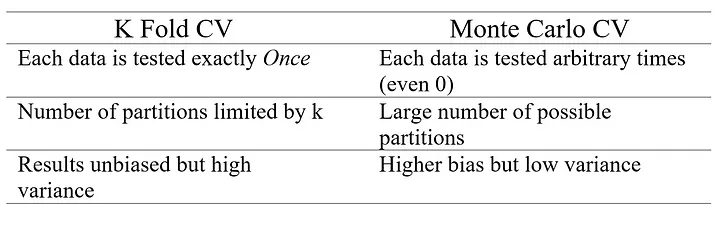

## Third: Monte Carlo Cross Validation



Steps:

1- Split training data randomly. For each iteration, the train-test split percentage is different.

2- Fit the model on train data set for that iteration and calculate test error using the fitted model on test data.

3- Repeat many iterations (say 100 or 500 or even 1000 iterations) and take the average of the test errors.

**Pros:** 
- The model has low bias
- Low time complexity
- The entire dataset is utilized for both training and validation.

**Cons:**

- Not suitable for an imbalanced dataset.

- particular data points could be left while some data points could be repeatedly used for training and testing. 


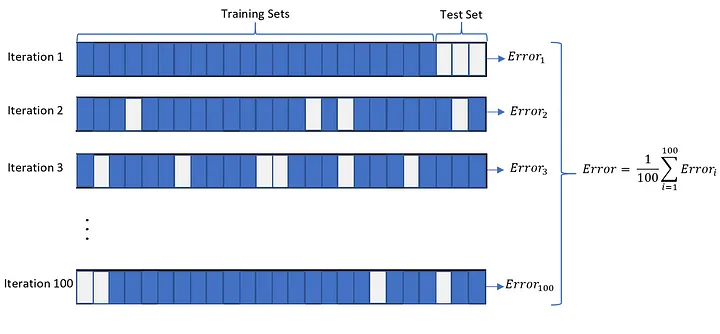

In [26]:
from sklearn.model_selection import ShuffleSplit

rs = ShuffleSplit(n_splits=5, test_size=.25, random_state=0)
rs.get_n_splits(df)

all_scores = []
for train_index, test_index in rs.split(df):
#     print("TRAIN:", train_index, "TEST:", test_index)

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model = RandomForestClassifier()

    model.fit(X_train, y_train)
    y_preds = model.predict(X_test)

    pr_auc = average_precision_score(y_preds, y_test)
    
    all_scores.append(pr_auc)

In [27]:
all_scores

[0.9397609383809661,
 0.9288495860053583,
 0.9223806782311365,
 0.9275676979087082,
 0.9384021490867778]

In [29]:
print(np.mean(all_scores))

0.9313922099225893


##Forth: Leave One Out Cross Validation



For a dataset having n rows, 1st row is selected for validation, and the rest (n-1) rows are used to train the model. For the next iteration, the 2nd row is selected for validation and rest to train the model. Similarly, the process is repeated until n steps or the desired number of operations. We then calculate the test Error to be the average of all of the test Errors


**Pros**:

- Simple, easy to understand, and implement.

**Cons**:

- The model may lead to a low bias.
- a computationally expensive method , as a major part of the data sample is used for training the model, however, only a single data point is used to evaluate its accuracy.  Therefore, this type is often considered to be .


 For the sake of time, we're goint to limit our dataset to 100 data points here:

![image.png](https://miro.medium.com/v2/resize:fit:600/1*26vyRHpqGbVAwJq_csUqZQ.gif)

In [22]:
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score

loo = LeaveOneOut()
loo.get_n_splits(X)


all_preds = []

for train_index, test_index in loo.split(X[:100]):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model = RandomForestClassifier()

    model.fit(X_train, y_train)
    y_preds = model.predict(X_test)

    correct = y_preds[0] == y_test.values[0]
    
    all_preds.append(correct)

TRAIN: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97 98 99] TEST: [0]
TRAIN: [ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97 98 99] TEST: [1]
TRAIN: [ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97 98 99] TEST: [2]
TRAIN: [ 0  1  2  4  5  6  7  8  9 10 11

1.0

In [23]:

sum(all_preds)/len(all_preds)

1.0

## Fifth: Stratified k-fold cross-validation:



For all the cross-validation techniques discussed above, they may not work well with an imbalanced dataset. Stratified k-fold cross-validation solved the problem of an imbalanced dataset.

In Stratified k-fold cross-validation, the dataset is partitioned into k groups or folds such that the validation data has an equal number of instances of target class label. This ensures that one particular class is not over present in the validation or train data especially when the dataset is imbalanced.

**Pros:**
- Works well for an imbalanced dataset.

**Cons:**
- Not suitable for time series dataset.

In [39]:
from sklearn.model_selection import StratifiedKFold

# X = df[features]
# y = df['isFraud']

# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []
  
for train_index, test_index in skf.split(X,y):
    x_train_fold, x_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    
    model = RandomForestClassifier()

    model.fit(X_train, y_train)
    y_preds = model.predict(X_test)

    pr_auc = average_precision_score(y_preds, y_test)

all_scores.append(pr_auc)


TypeError: ignored

## Sixth : Rolling Cross Validation OR (Time Series KFold)




For data based on time series, no cross-validation method is effective except the rolling cross-validation method. This method involves taking a subset out of the data set that serves as the training data set. 

The order of the data is very important for time-series related problem. For time-related dataset random split or k-fold split of data into train and validation may not yield good results.

For the time-series dataset, the split of data into train and validation is according to the time . For a particular iteration, the next instance of train data can be treated as validation data.



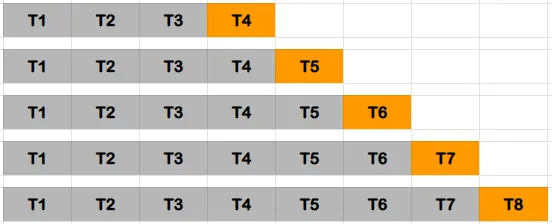

As mentioned in the above diagram, for the 1st iteration, 1st 3 rows are considered as train data and the next instance T4 is validation data. The chance of choice of train and validation data is forwarded for further iterations.

In [25]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit()

all_scores = []

for train_index, test_index in tscv.split(X):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model = RandomForestClassifier()

    model.fit(X_train, y_train)
    y_preds = model.predict(X_test)

    pr_auc = average_precision_score(y_preds, y_test)
    
    all_scores.append(pr_auc)
    
    
print(all_scores)

[0.012087607429997227, 0.00787357915164957, 0.005433878569448295, 0.0047130579428888274, 0.003271416689769892]


In [28]:
print(np.mean(all_scores))

0.9945385489728591


**Rsources**

- https://www.analyticssteps.com/blogs/7-types-cross-validation

- https://towardsdatascience.com/understanding-8-types-of-cross-validation-80c935a4976d